# Reinforcement Learning - M2019

## Arnav Kumar - 2016228

# Q1

In [21]:
import numpy as np
import matplotlib.pyplot as plt

val = np.random.random()

In [27]:
TimeSteps = 10000
Runs = 2000
Bandits = 10

mean = 0
variance = 0.01
epsilon = 0.1
alpha = 0.1

AvgRewardValue = np.zeros(TimeSteps)
Optimalstep = np.zeros(TimeSteps)

for i in range(Runs):
    a = np.zeros(Bandits)
    r = np.zeros(TimeSteps)
    den = np.ones(Bandits)
    Qstar = np.full(Bandits,val)
    
    for j in range(TimeSteps):
        currAction = 0 
        explore = True
        prob = np.random.uniform(0,1)
        if(prob>epsilon):
            explore = False
            
        if(explore):
            currAction = np.random.randint(Bandits)
        else:
            currAction = np.argmax(a)
            
        reward = np.random.normal(Qstar[currAction], 1)
        
        a[currAction] += (reward - a[currAction])/den[currAction]
        den[currAction]+=1
        
        Qstar += np.random.normal(mean,variance,Bandits)
        
        optimalAction = np.argmax(Qstar)
        
        r[j] = reward
        
        if(optimalAction == currAction):
            Optimalstep[j]+=1
        
    AvgRewardValue += r
    


In [28]:
SampleAvg = AvgRewardValue / Runs
OptimalperStepforSampleAvg = (Optimalstep / Runs) * 100

In [32]:
AvgOptimal = np.zeros(TimeSteps)
OptimalstepforConstantStepSize = np.zeros(TimeSteps)


for i in range(Runs):
    a = np.zeros(Bandits)
    r = np.zeros(TimeSteps)
    den = np.ones(Bandits)
    Qstar = np.full(Bandits,val)
    
    for j in range(TimeSteps):
        currAction = 0 
        explore = True
        prob = np.random.uniform(0,1)
        if(prob>epsilon):
            explore = False
            
        if(explore):
            currAction = np.random.randint(Bandits)
        else:
            currAction = np.argmax(a)
            
        reward = np.random.normal(Qstar[currAction], 1)
        
        a[currAction] += (reward - a[currAction]) * alpha
        den[currAction]+=1
        
        Qstar += np.random.normal(mean,variance,Bandits)
        
        optimalAction = np.argmax(Qstar)
        
        r[j] = reward
        
        if(optimalAction == currAction):
            OptimalstepforConstantStepSize[j]+=1
        
    AvgOptimal += r
    
WeightedAvg = AvgOptimal / Runs
OptimalperStepforConstantStepSize = (OptimalstepforConstantStepSize / Runs) * 100


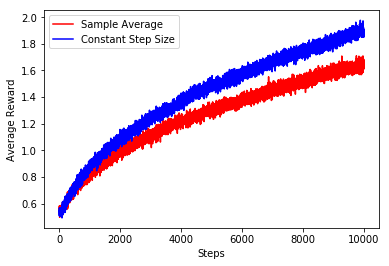

In [36]:
plt.plot(SampleAvg,color = 'r', label = 'Sample Average' )
plt.plot(WeightedAvg,color = 'b',label = 'Constant Step Size')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()

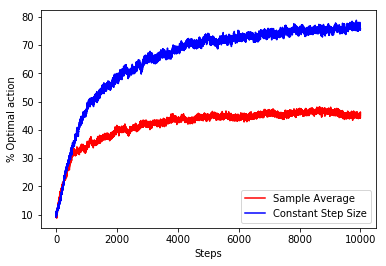

In [37]:
plt.plot(OptimalperStepforSampleAvg,color = 'r' ,label = 'Sample Average')
plt.plot(OptimalperStepforConstantStepSize,color = 'b',label = 'Constant Step Size')
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()